In [22]:
import pickle
import pandas
import datetime
import numpy
import datetime

from matplotlib import pyplot
from matplotlib import dates
from scipy.spatial import Voronoi, voronoi_plot_2d
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import misc

### Disto delta-T

In [11]:
next_df = pickle.load(open('archive/bikemi_dataframe.pkl', 'rb'))

In [12]:
tmp = next_df['Durata_sec'].tolist()
a = tmp/60

(0, 36)

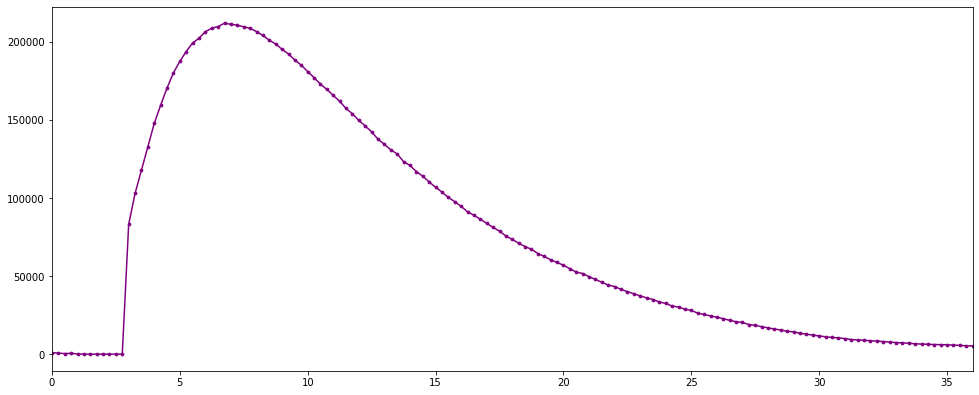

In [4]:
fig = pyplot.figure(figsize=(16.5, 6.7))
ax = fig.gca()
eps = 0.25
y, x = numpy.histogram(a, numpy.arange(0, max(a)+2*eps, eps))
ax.plot(x[:-1], y, marker='.',ms=5.5, linestyle='-', color='purple')
ax.set_xlim(0, 36)
#ax.set_ylim(0, 250)

In [5]:
numpy.mean(a), numpy.percentile(a, 50), numpy.std(a), numpy.where(y == max(y))[0][0]

(15.035625407560817, 10.866666666666667, 30.581304023183502, 27)

(0, 60)

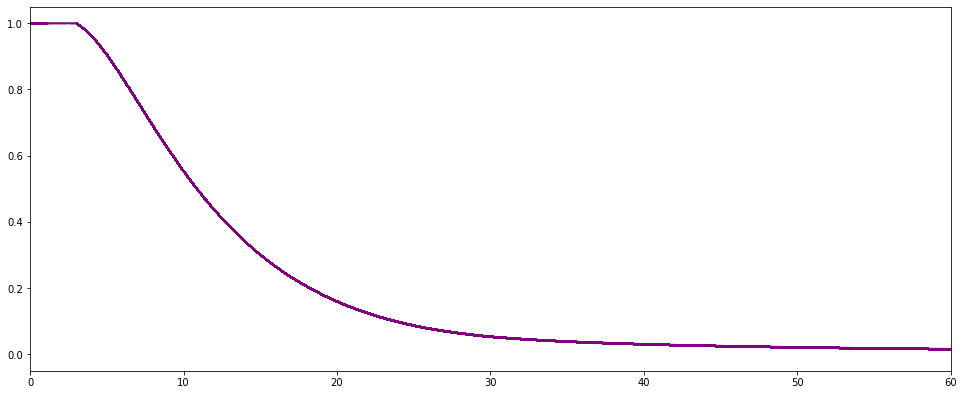

In [16]:
# CCDF
fig = pyplot.figure(figsize=(16.5, 6.7))
ax = fig.gca()
ecdf = ECDF(a)
ax.plot(ecdf.x, 1-ecdf.y, marker='.',ms=0.5, linestyle='-', color='black')
ax.set_xlim(0, 60)
#ax.set_ylim(0, 250)

In [15]:
ecdf(10)-ecdf(3)

0.4474570818818065

### Partenze e arrivi

In [ ]:
def nit(t):
    return 60*(60*t.hour+t.minute)+t.second

In [53]:
a = [nit(i) for i in next_df['Data_prelievo'].tolist()]
b = [nit(i) for i in next_df['Data_arrivo'].tolist()]

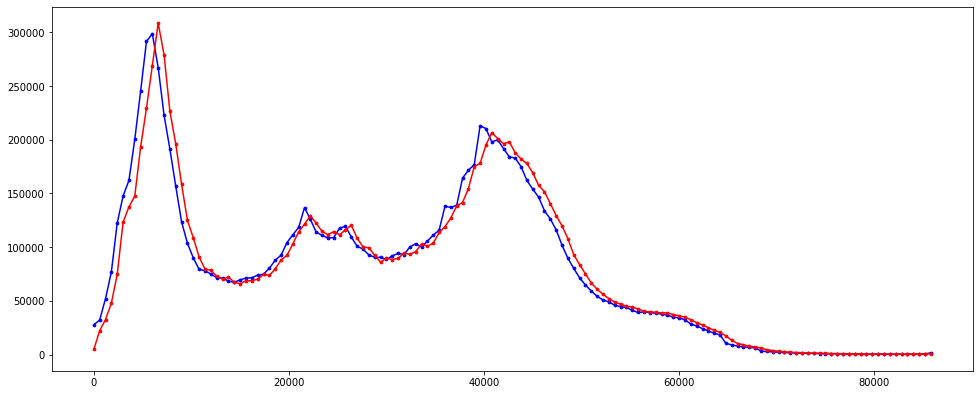

In [74]:
fig = pyplot.figure(figsize=(16.5, 6.7))
ax = fig.gca()
eps = 60*60/6

tmp = [(i-(7*60*60))%(60*60*24) for i in a]
y, x = numpy.histogram(tmp, numpy.arange(0, max(tmp)+eps, eps))
ax.plot(x[:-1], y, marker='.',ms=5.5, linestyle='-', color='blue')

tmp = [(i-(7*60*60))%(60*60*24) for i in b]
y, x = numpy.histogram(tmp, numpy.arange(0, max(tmp)+eps, eps))
ax.plot(x[:-1], y, marker='.',ms=5.5, linestyle='-', color='red')

## Voronoi Plots 

In [ ]:
gps = pickle.load(open('/home/datasets/bikemi/station_gps_location.pkl', 'rb'))

In [ ]:
lst = [(g[1],g[0]) for g in gps.values()]
raw_voronoi = Voronoi(lst)

In [ ]:
# figur-tela e i sui assi
fig = pyplot.figure(figsize=(16.5, 11.7))
ax = fig.gca()

In [ ]:
voronoi_plot_2d(
    raw_voronoi,
    ax = ax,
    show_points = True,
    show_vertices = False,
    line_colors = "black",
    line_width = 1.0,
    line_alpha = 1.0,
    point_size = 7
)

In [ ]:
cy = [i[1] for i in raw_voronoi.vertices]
cx = [i[0] for i in raw_voronoi.vertices]

ax.plot(cx, cy, marker='.',ms=1.5, linestyle=' ', color='purple')

ax.set_xlim(min(cx)-0.04,max(cx)+0.04)
ax.set_ylim(min(cy)-0.04,max(cy)+0.04)

### View 

In [ ]:
fig.savefig('paint.png', dpi=600)

### Sample 

In [ ]:
csv_uri = '/home/datasets/bikemi/2017/12 2017.csv'

In [ ]:
df = pandas.read_csv(csv_uri,
                           lineterminator ='\r',
                           encoding = 'iso8859_2',
                           sep = ';',
                           parse_dates = ['Data_prelievo','Data_arrivo'],
                           date_parser = lambda x: datetime.datetime.strptime(x,'%d/%m/%y %H:%M'),
                           decimal = '.'
                          )

In [ ]:
nomi = set()
for _, i in df.iterrows():
    nomi.add(i['Nome_stazione_arrivo'])
    nomi.add(i['Nome_stazione_prelievo'])

In [ ]:
nomi

### Beta distro

In [ ]:
# distro word topic
rgb = ['black','grey','pink','brown','purple','blue','green','yellow','orange','red']
fig = pyplot.figure(figsize=(16.5, 11.7))
ax = fig.gca()
for i in range(len(categories)):
    t= [b[i,j] for j in range(len(b[i]))]
    x, y = numpy.histogram(t, range(max(t)))
    ax.loglog(y[1:], x, marker='.',ms=2.25, linestyle='', color=rgb[i])